In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df_train = pd.read_csv('./train.csv')
df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1


In [3]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-14.880285,-413.657030,17.037929,5.627481,6.262187,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.625478,5.150013,6282.637653,174.281276,19.959450,32.278906,206.323118,8.337124,232.140628,-5.120450
1,-13.987087,-235.197680,53.670585,4.743702,4.670301,1226.941573,-184.656449,7.034055,55445.68723,15.189238,15.746002,3.880180,3759.028105,32.216142,17.054081,35.934156,191.790254,10.985527,267.024627,-5.200961
2,-11.764850,-192.880170,38.687566,5.606648,4.147060,940.690132,-182.564985,17.218596,31562.61815,34.769586,12.766144,4.885215,6722.719526,181.736690,20.479688,33.809666,166.718488,7.087623,115.762593,-6.080712
3,-10.790193,-204.849932,50.837951,5.934410,5.310772,794.581702,-245.911853,9.936746,47299.76010,25.565751,14.068207,7.156563,5651.188202,127.570137,20.904829,49.857911,139.872041,9.597151,213.574163,-6.355565
4,-17.113392,-141.457819,53.246627,5.939751,5.631022,543.441438,-302.081360,21.861266,66725.53006,34.796947,13.834198,4.743589,5376.558510,119.269139,19.826086,39.903060,311.541001,12.573611,263.709173,-4.329967


In [4]:
# Your work
# Must have
# 1. Cleansing data
# 2. Exploratory Data Analysis (describe insight and visualization)
# 3. Training data - Crossvalidation
# 4. Testing data

In [5]:
print(df_train.isnull().sum())

x1     109
x2      34
x3      56
x4      93
x5      60
x6     118
x7      81
x8     135
x9       0
x10     79
x11     17
x12     12
x13    130
x14    124
x15    107
x16     93
x17    125
x18     20
x19    145
x20    126
y        0
dtype: int64


In [6]:
df = df_train.apply(lambda x: x.fillna(x.mean()),axis=0)

In [7]:
y = df['y']
X = df.drop('y', axis=1)

In [8]:
print(df.isnull().sum())

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
y      0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X) , columns= X.columns)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [11]:
np.sum(y_train) / len(y_train)

0.25583333333333336

<AxesSubplot:ylabel='y'>

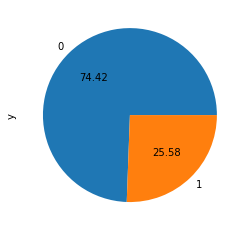

In [12]:
y_train.value_counts().plot.pie(autopct = '%.2f')

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

<AxesSubplot:ylabel='y'>

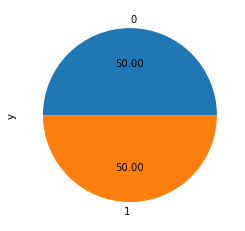

In [14]:
y_ros.value_counts().plot.pie(autopct = '%.2f')

In [15]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

In [16]:
nn_model.fit(X_ros, y_ros)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [17]:
print(f"Neural Network: {nn_model.score(X_test, y_test)}")

Neural Network: 0.9766666666666667


In [18]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(nn_model, X, y, cv=10, scoring='accuracy').mean())

0.9778666666666667


In [19]:
predict = nn_model.predict(df_test)
fields = ['id','Expected']
df = pd.DataFrame()
id = list(range(1,2501))
df['id']=pd.Series(id)
df['Expected']=pd.Series(predict)
df.to_csv('submit6.csv', index=False)